Final error after gradient descent: 4.4961047667431675


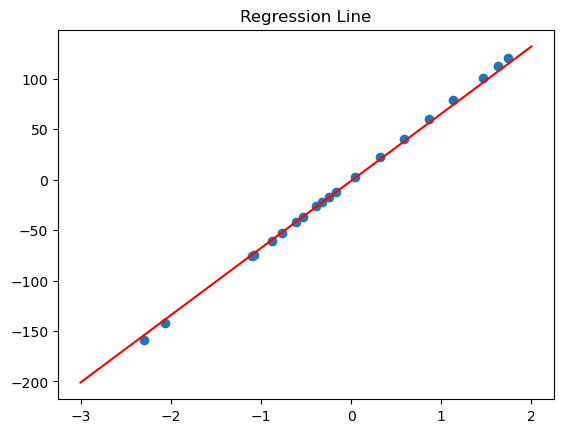

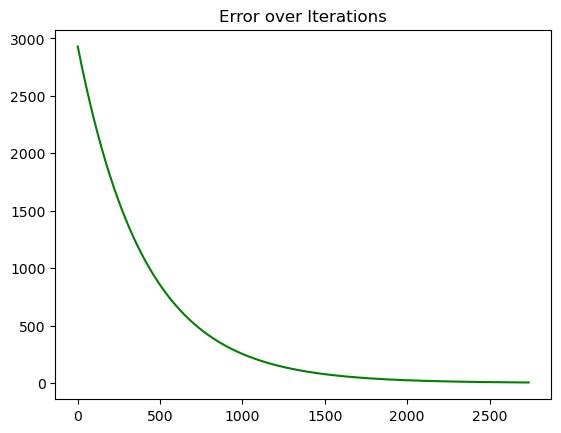

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

class Model:
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_error = float('inf')
        while step < max_steps:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_error = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if abs(prev_error - new_error) < accuracy:
                break
            prev_error = new_error
        return steps, errors

hyp = Model()
steps, errors = hyp.fit(x, y)

final_error = hyp.error(x, y)
print("Final error after gradient descent:", final_error)

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.title("Regression Line")
plt.show()

plt.figure()
plt.plot(steps, errors, 'g')
plt.title("Error over Iterations")
plt.show()



Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

Initial b0: 0, Initial b1: 0, Final Error: 4.4961047667431675


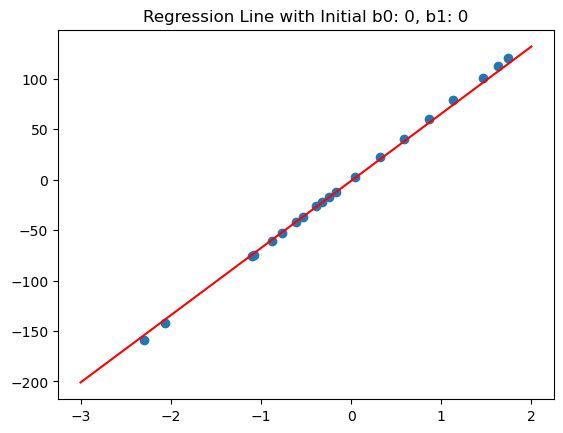

Initial b0: 5, Initial b1: 5, Final Error: 4.319501337795024


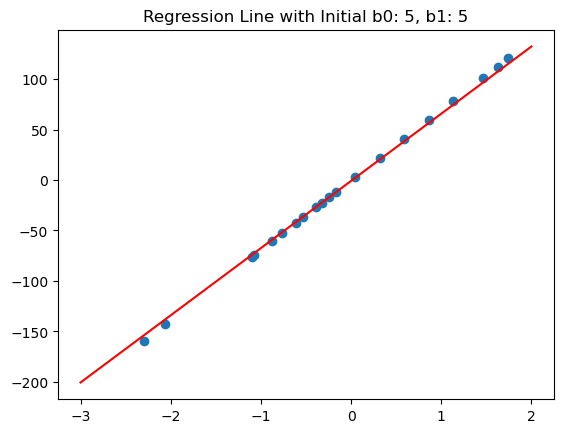

Initial b0: -5, Initial b1: -5, Final Error: 4.644614710738108


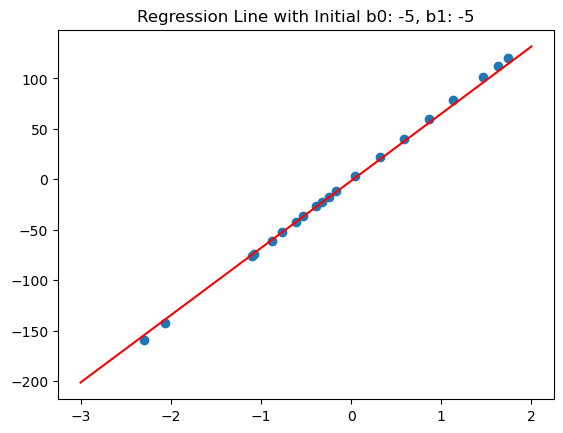

Initial b0: 10, Initial b1: -10, Final Error: 4.261376260186844


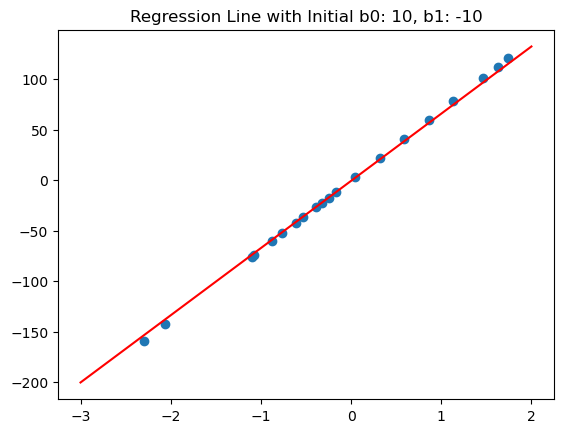

In [3]:
def test_model_with_initial_values(initial_b0, initial_b1):
    test_model = Model()
    test_model.b0, test_model.b1 = initial_b0, initial_b1
    _, errors = test_model.fit(x, y)
    final_error = test_model.error(x, y)
    print(f"Initial b0: {initial_b0}, Initial b1: {initial_b1}, Final Error: {final_error}")
    X0 = np.linspace(-3, 2, 100)
    Y0 = test_model.predict(X0)
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.title(f"Regression Line with Initial b0: {initial_b0}, b1: {initial_b1}")
    plt.show()
test_model_with_initial_values(0, 0) 
test_model_with_initial_values(5, 5)
test_model_with_initial_values(-5, -5)
test_model_with_initial_values(10, -10)



Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

Learning Rate: 0.001, Final Error: 4.4961047667431675


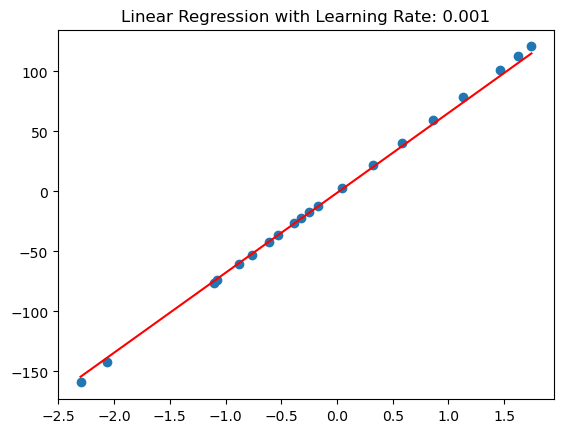

Learning Rate: 0.01, Final Error: 0.46616638859625487


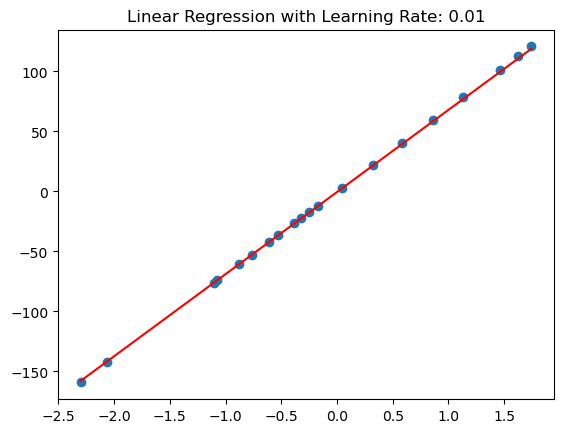

Learning Rate: 0.1, Final Error: 0.0352205724003429


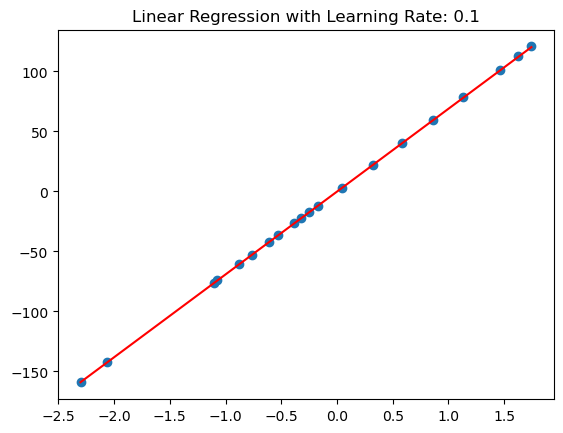

Learning Rate: 1, Final Error: 0.0008603627290350647


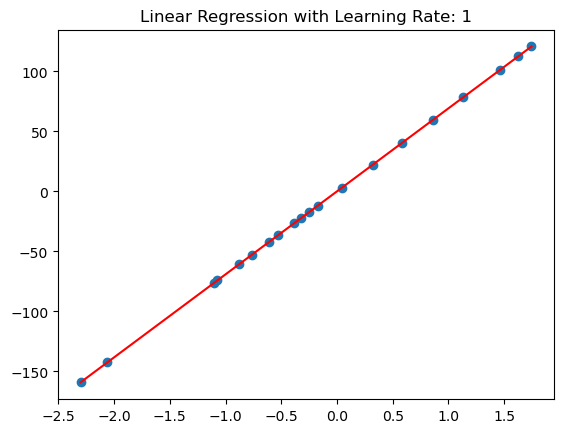

Learning Rate: 10, Final Error: nan


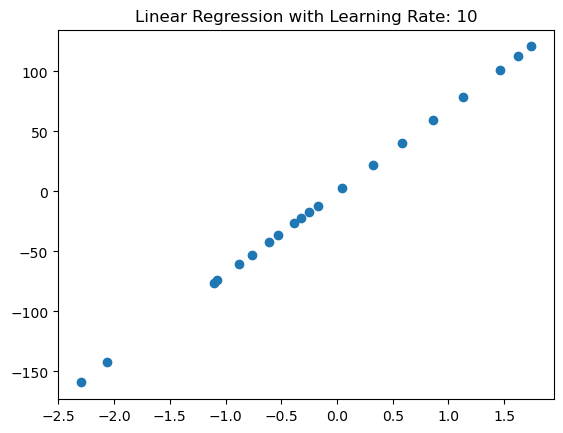

In [5]:
def test_learning_rate(alpha):
    model = Model()
    _, errors = model.fit(x, y, alpha=alpha)
    final_error = model.error(x, y)
    print(f"Learning Rate: {alpha}, Final Error: {final_error}")
    if len(errors) > 1 and errors[-1] > errors[0]:
        print("The model diverges with this learning rate.")
    X_plot = np.linspace(min(x), max(x), 100)
    Y_plot = model.predict(X_plot)
    plt.scatter(x, y)
    plt.plot(X_plot, Y_plot, color='red')
    plt.title(f"Linear Regression with Learning Rate: {alpha}")
    plt.show()
test_learning_rate(0.001)
test_learning_rate(0.01)
test_learning_rate(0.1)
test_learning_rate(1)
test_learning_rate(10)

Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

Final Error with DataFrame input: 4.4961047667431675


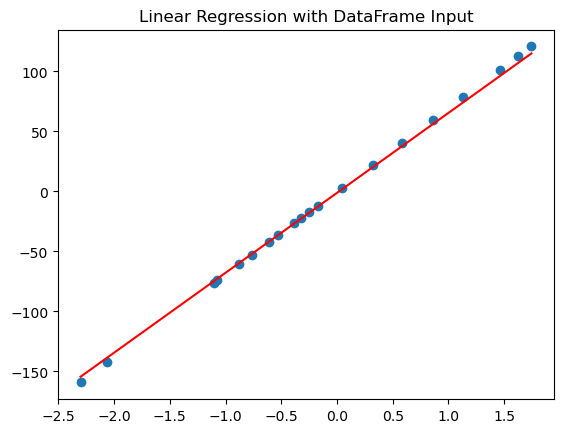

In [12]:
class ModifiedModel:
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_error = float('inf')

        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]

        while step < max_steps:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_error = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if abs(prev_error - new_error) < accuracy:
                break
            prev_error = new_error
        return steps, errors

x_df = pd.DataFrame(x, columns=['0'])
y_df = pd.DataFrame(y, columns=['0'])

modified_model = ModifiedModel()
modified_model.fit(x_df, y_df)

final_error_df = modified_model.error(x_df, y_df)
print("Final Error:", final_error_df)

X_plot = np.linspace(min(x_df['0']), max(x_df['0']), 100)
Y_plot = modified_model.predict(pd.DataFrame(X_plot, columns=['0']))
plt.scatter(x_df['0'], y_df['0'])
plt.plot(X_plot, Y_plot, color='red')
plt.show()


Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

Final Error with Advanced Gradient Descent: 0.03937321303112905


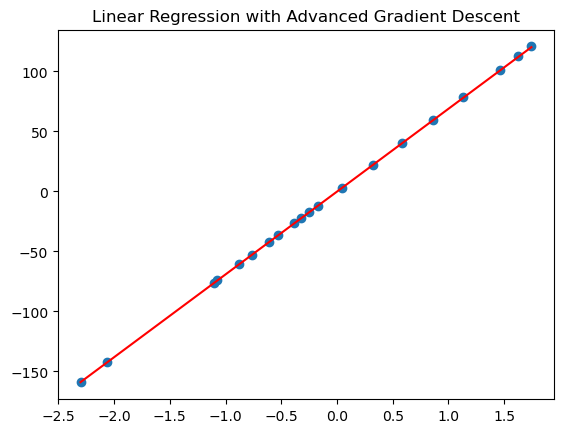

In [14]:
class AdvancedModel:
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000, min_error_decrease=1e-6):
        steps, errors = [], []
        step = 0
        prev_error = float('inf')

        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]

        while step < max_steps:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_error = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)

            
            if abs(prev_error - new_error) < min_error_decrease:
                print(f"Stopping early at step {step} due to minimal decrease in error.")
                break
            prev_error = new_error

        return steps, errors

advanced_model = AdvancedModel()
steps, errors = advanced_model.fit(x_df, y_df)

final_error_advanced = advanced_model.error(x_df, y_df)
print("Final Error:", final_error_advanced)

X_plot = np.linspace(min(x_df['0']), max(x_df['0']), 100)
Y_plot = advanced_model.predict(pd.DataFrame(X_plot, columns=['0']))
plt.scatter(x_df['0'], y_df['0'])
plt.plot(X_plot, Y_plot, color='red')
plt.show()


Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

Stopping at max steps: 5000
Final Error with Reliable Gradient Descent: 0.03937321303112905


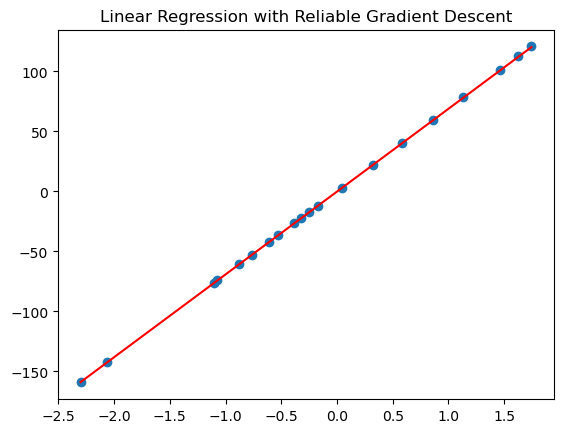

In [15]:
class ReliableModel:
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000, min_error_decrease=1e-6):
        steps, errors = [], []
        step = 0
        prev_error = float('inf')

        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]

        while step < max_steps:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_error = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)

            if abs(prev_error - new_error) < min_error_decrease:
                print(f"Stopping early at step {step} due to minimal decrease in error.")
                break
            prev_error = new_error

            if step == max_steps:
                print(f"Stopping at max steps: {max_steps}")

        return steps, errors

reliable_model = ReliableModel()
steps, errors = reliable_model.fit(x_df, y_df)

final_error_reliable = reliable_model.error(x_df, y_df)
print("Final Error :", final_error_reliable)

X_plot = np.linspace(min(x_df['0']), max(x_df['0']), 100)
Y_plot = reliable_model.predict(pd.DataFrame(X_plot, columns=['feature']))
plt.scatter(x_df['0'], y_df['0'])
plt.plot(X_plot, Y_plot, color='red')
plt.show()


Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

Stopping early at step 9 due to minimal decrease in error.
Final Error with Adaptive Learning Rate: 4.1772608368551725e-08


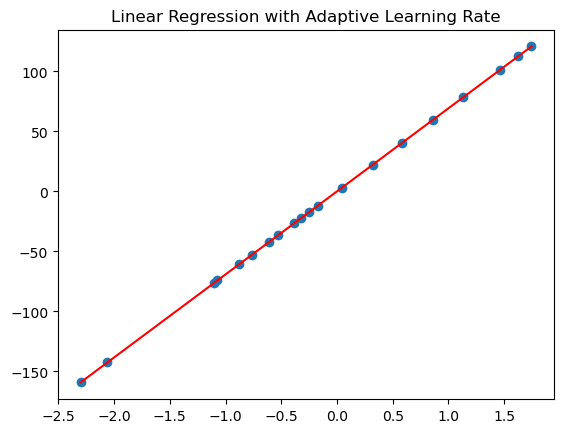

In [16]:
class AdaptiveModel:
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def gradient_step(self, X, Y, alpha):
        dJ0 = sum(self.predict(X) - Y) / len(X)
        dJ1 = sum((self.predict(X) - Y) * X) / len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
        return self.error(X, Y)

    def fit(self, X, Y, initial_alpha=1, accuracy=0.01, max_steps=5000, min_error_decrease=1e-6):
        steps, errors = [], []
        step = 0
        prev_error = float('inf')
        alpha = initial_alpha

        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]

        while step < max_steps:
            current_error = self.gradient_step(X, Y, alpha)
            steps.append(step)
            errors.append(current_error)

            if current_error > prev_error:
                alpha /= 2
                self.b0, self.b1 = 0, 0 
                step = 0 
                prev_error = float('inf')
                continue


            if abs(prev_error - current_error) < min_error_decrease:
                print(f"Stopping early at step {step} due to minimal decrease in error.")
                break

            prev_error = current_error
            step += 1

            if step == max_steps:
                print(f"Stopping at max steps: {max_steps}")

        return steps, errors

adaptive_model = AdaptiveModel()
steps, errors = adaptive_model.fit(x_df, y_df)

final_error_adaptive = adaptive_model.error(x_df, y_df)
print("Final Error:", final_error_adaptive)

X_plot = np.linspace(min(x_df['0']), max(x_df['0']), 100)
Y_plot = adaptive_model.predict(pd.DataFrame(X_plot, columns=['0']))
plt.scatter(x_df['0'], y_df['0'])
plt.plot(X_plot, Y_plot, color='red')
plt.show()


Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

Stopping early at step 9 due to minimal decrease in error.


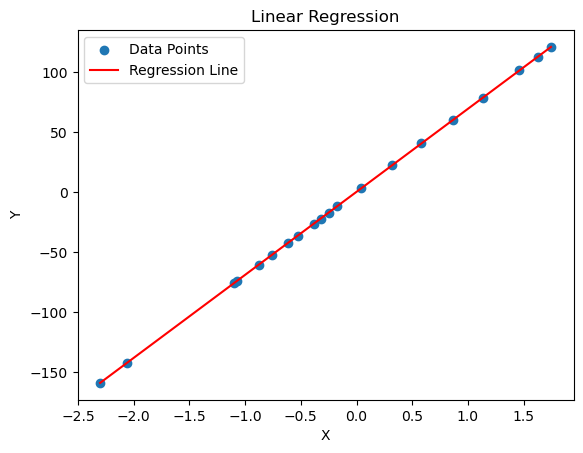

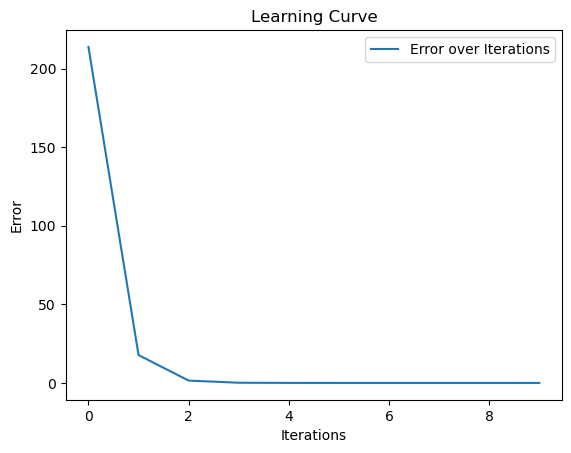

In [17]:
class GraphingModel(AdaptiveModel):
    def plot_regression(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]
        plt.scatter(X, Y, label='Data Points')
        X_line = np.linspace(X.min(), X.max(), 100)
        Y_line = self.predict(X_line)
        plt.plot(X_line, Y_line, color='red', label='Regression Line')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()
    def plot_learning_curve(self, errors):
        plt.plot(errors, label='Error over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Error')
        plt.title('Learning Curve')
        plt.legend()
        plt.show()

graphing_model = GraphingModel()
_, errors = graphing_model.fit(x_df, y_df)

graphing_model.plot_regression(x_df, y_df)

graphing_model.plot_learning_curve(errors)
